In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

### **Dataset**

In this project, the results and images we get is related to the 'cell_samples.csv' dataset!!

In [3]:
# Let's get the dataset with pandas.read_csv() function
df = pd.read_csv("cell_samples.csv")
df.head() # we run this row fro examining first 5 columns

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html].


| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:


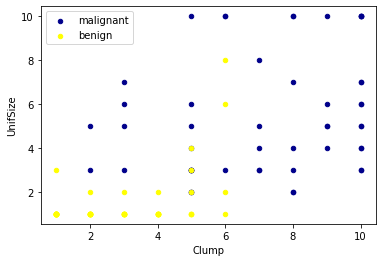

In [5]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant'); # we are plotting the malignant cells with respect to the *Clump* and *UnifSize* fetures.
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);# we are plotting the benign cells with respect to the *Clump* and *UnifSize* fetures.
plt.savefig("Scatter_plot_of_classes")
plt.show()

In [6]:
df.isna().sum() # checking whether null character exists

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [7]:
df.dtypes # checking the types of the colums for observing any non-numerical data exists in the columns.

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
df.head(26)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


you can see '?' sign at the 23th row

In [4]:
# I find there is non-numerical variables in 'BareNuc' column, so I change it as a NaN then drop the NaN values from the dataset.
df1 = df.copy() # I use copy() method
df1 = df1[pd.to_numeric(df1['BareNuc'], errors='coerce').notnull()] 
df1['BareNuc'] = df1['BareNuc'].astype('int')
df1.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [10]:
df1.head(26)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


as you can see, the columns turned NaN and after that dropped

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int32
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


we can see there are '699 - 683 ' = *16* non-numeric datas in the *BareNuc* column

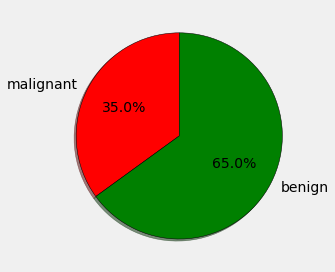

In [10]:
plt.style.use('fivethirtyeight')
malignant = df1[df1['Class'] == 4].shape[0]
benign = df1[df1['Class'] == 2].shape[0]
class_ = [malignant, benign]
label = ['malignant', 'benign']
plt.pie(class_, labels = label, shadow = True,  wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()

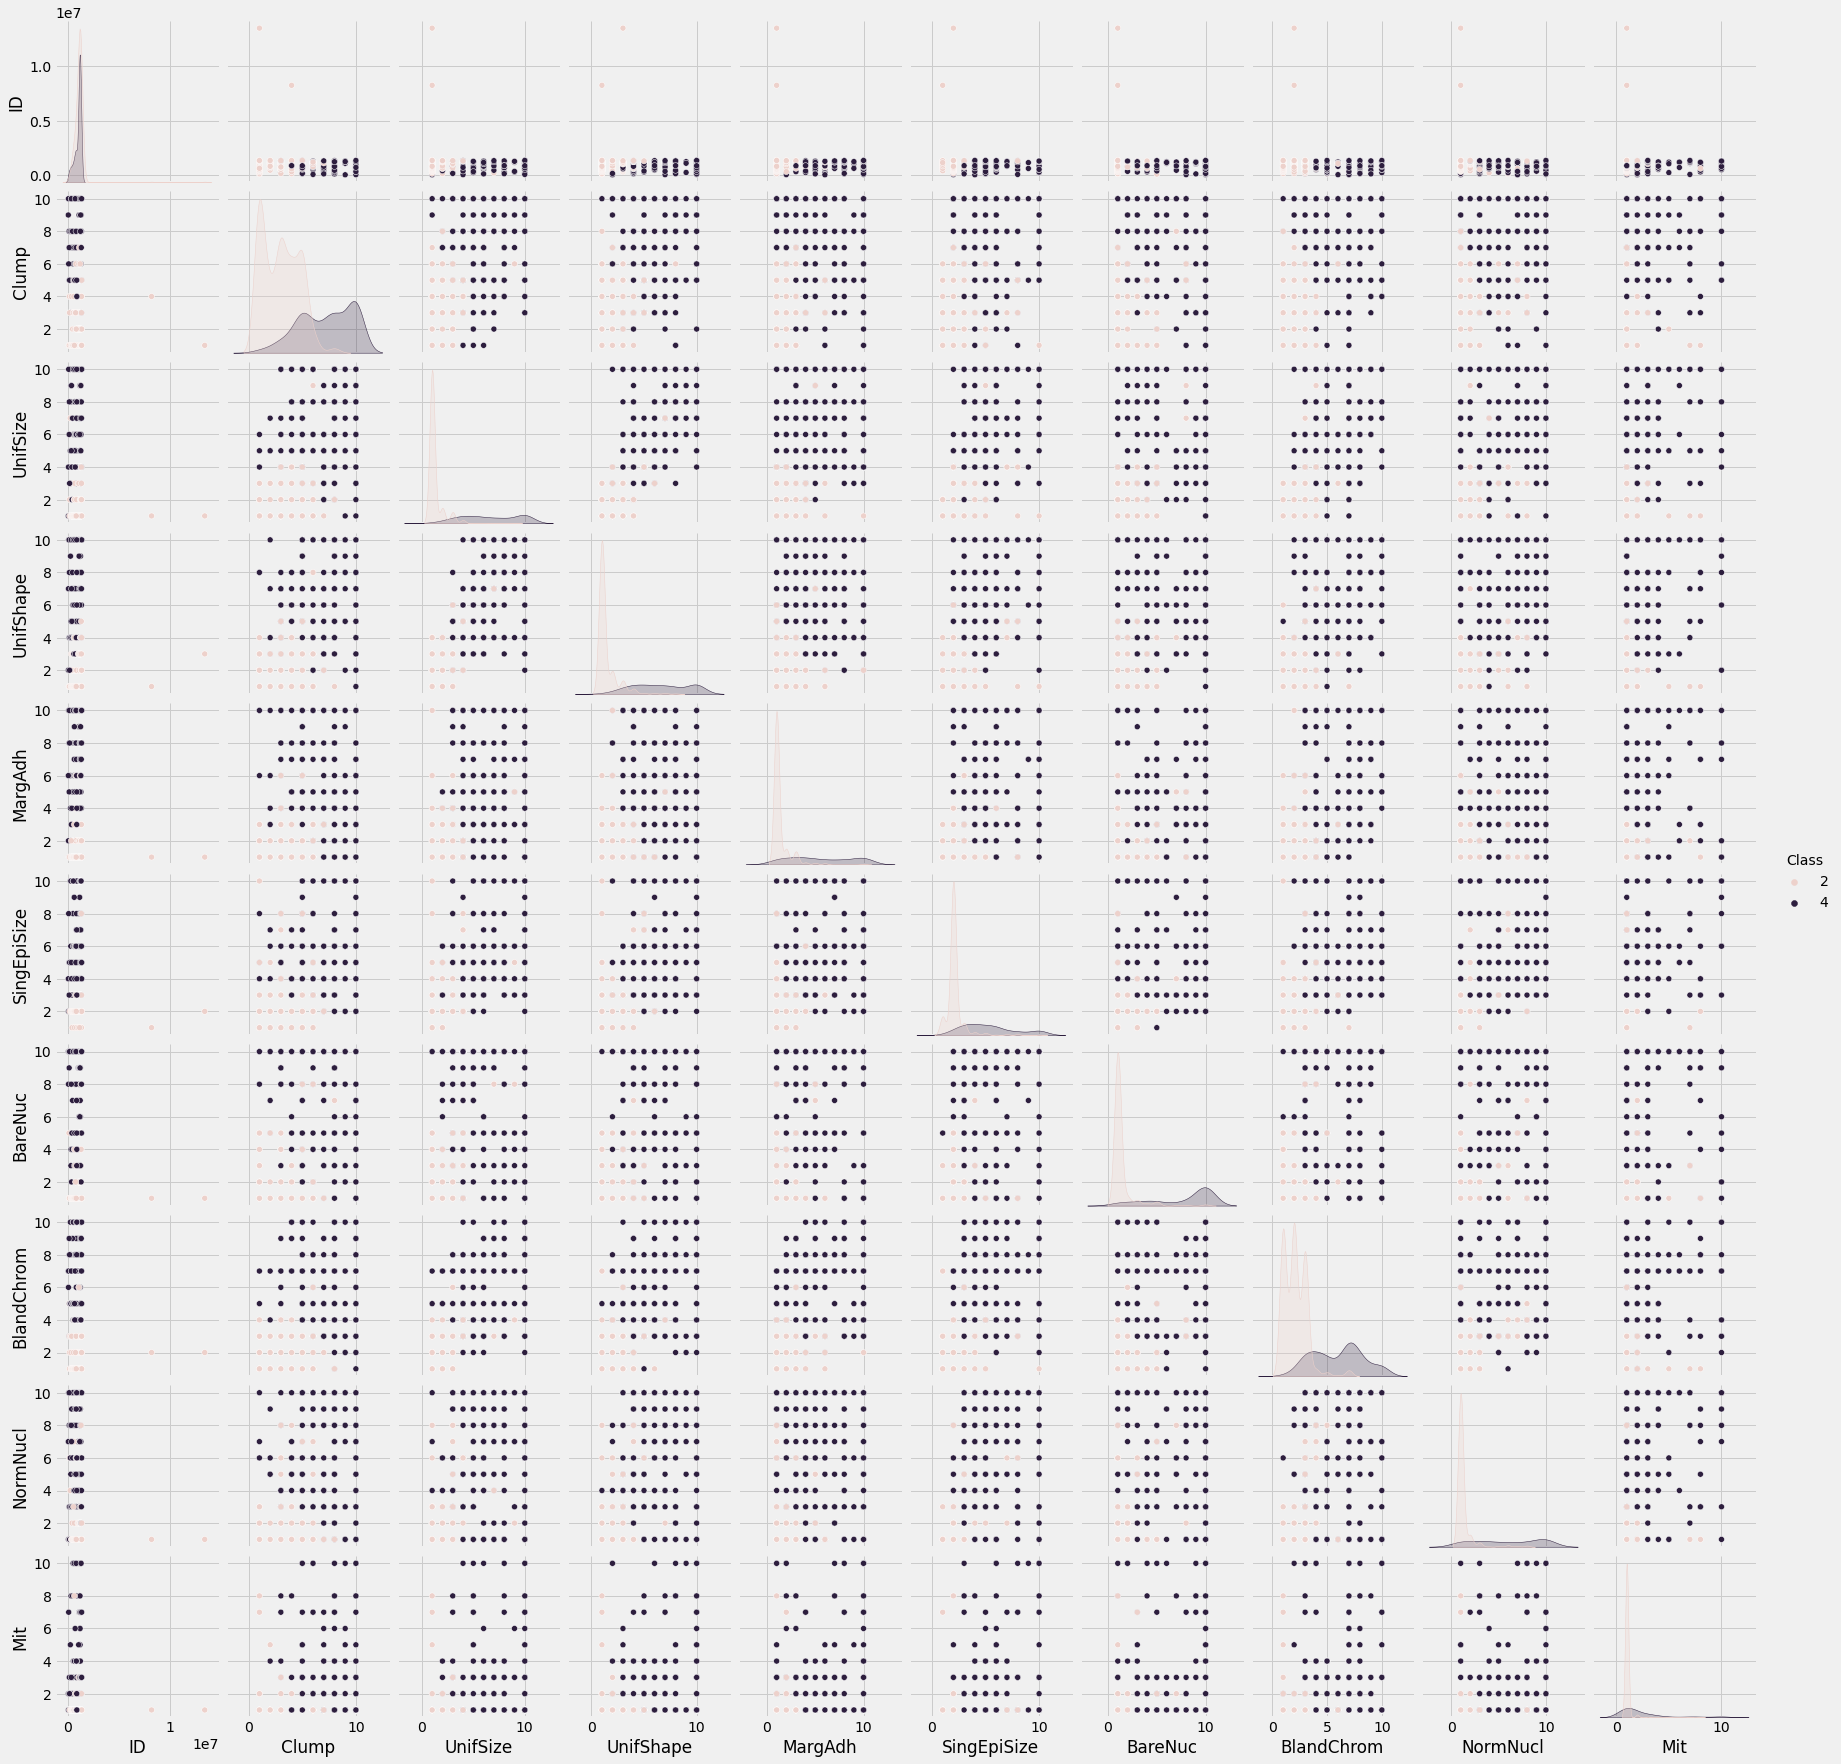

In [30]:
plt.style.use('fivethirtyeight')
sns.pairplot(df1, hue = 'Class')
plt.savefig("knn_visual.png")

In [5]:
# ID column will not be included because it depends on random numbers and does not mean anything for the model.
feature_df = df1[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [6]:
df1['Class'] = df1['Class'].astype('int')
y = np.asarray(df1['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

#### You can see the DataFrame version, if you want to see correlations, please run the following codes. Because of the .corr() function does not fit with the numpy arrays, ı found a solution like that.

In [5]:
# with dataframe
feature_df = df1[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = feature_df
X[0:5]

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [6]:
# with dataframe
y = df1['Class'] = df1['Class'].astype('int')
y = df1['Class']
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int32

### **Train/Test Split**

In [7]:
# our test set is 30% of entire dataset where 80% of entire datasets splitted for train set. Random state adjusted to the 0 value, so we will get same result when we run it again and again.
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


### Please run the following 2 cells included "defining correlation function" part.

In [15]:
correlation = x_train.corr()
correlation

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
Clump,1.000000,0.671856,0.681320,0.478658,0.553462,0.577415,0.571516,0.549512,0.339648
UnifSize,0.671856,1.000000,0.903290,0.693677,0.776234,0.660259,0.763186,0.737248,0.445897
UnifShape,0.681320,0.903290,1.000000,0.677397,0.741282,0.700011,0.745139,0.749165,0.399625
MargAdh,0.478658,0.693677,0.677397,1.000000,0.590900,0.665403,0.690796,0.604258,0.365532
SingEpiSize,0.553462,0.776234,0.741282,0.590900,1.000000,0.589414,0.604820,0.635788,0.505152
BareNuc,0.577415,0.660259,0.700011,0.665403,0.589414,1.000000,0.660729,0.578578,0.329895
BlandChrom,0.571516,0.763186,0.745139,0.690796,0.604820,0.660729,1.000000,0.668210,0.346464
NormNucl,0.549512,0.737248,0.749165,0.604258,0.635788,0.578578,0.668210,1.000000,0.433553
Mit,0.339648,0.445897,0.399625,0.365532,0.505152,0.329895,0.346464,0.433553,1.000000


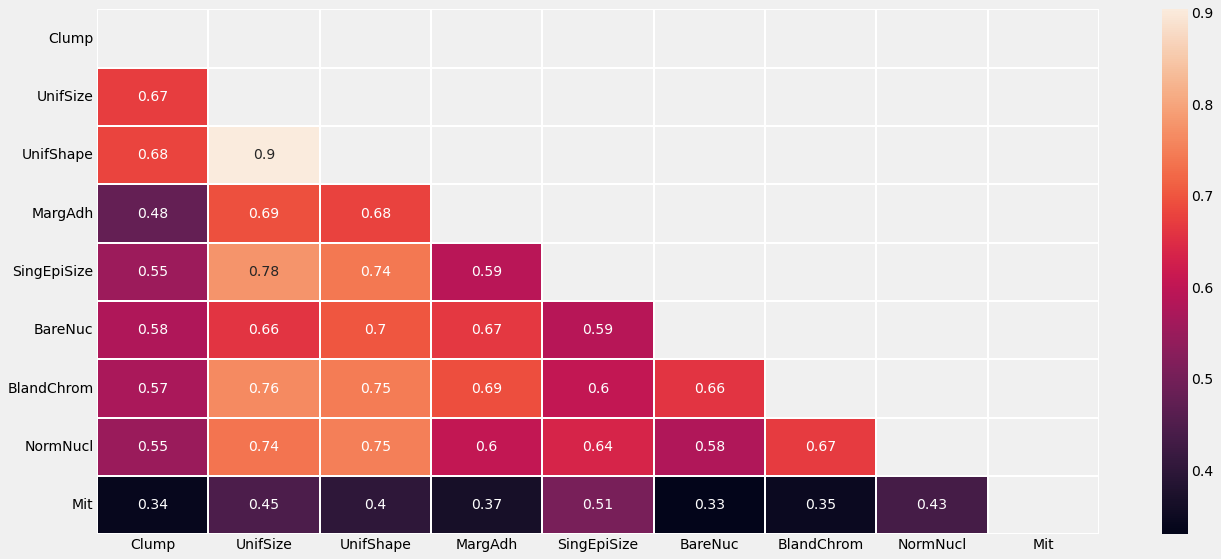

In [15]:
plt.figure(figsize = (20, 9))
matrix = np.triu(correlation)     
sns.heatmap(correlation, mask = matrix, annot = True, linewidth = 1.5)
plt.savefig("correlation_with_df")

this is made to see if there are any high correlated pairs, with the threshold value you will adjust you can drop these correlated values. For this dataset, I think there is no problem with hte correlation values.

## Defininig Correlation Function

In [22]:
def correlation(dataset, thres):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thres: # we are interested in absolute coeff value
                columname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(columname)
    return col_corr

#### If you use DataFrame index part to visualize and modify the correlations, then you can also change the type DataFrame to numpy.array by running the cell below

In [16]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

## **New Dataset**

In [2]:
veri = pd.read_csv("iris.csv")
veri.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
X = veri.iloc[:, :-1].values
Y = veri.iloc[:, -1].values

### Scaling

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)

### Splitting data train and test set with percentages 70% and 30%

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("Train shape: ", x_train.shape, y_train.shape)
print("Test shape: ", x_test.shape, y_test.shape)

Train shape:  (104, 4) (104,)
Test shape:  (45, 4) (45,)


## **New Dataset**

In [3]:
veri = pd.read_csv("teleCust1000t.csv")
from sklearn import preprocessing
X = veri[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values #.astypefloat
y = veri['custcat'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Train shape: ", x_train.shape, y_train.shape)
print("Test shape: ", x_test.shape, y_test.shape)

Train shape:  (700, 11) (700,)
Test shape:  (300, 11) (300,)


## **New Dataset**

In [37]:
df = pd.read_csv("winequality-white.csv")
veri = pd.DataFrame(data = df, index = range(2000))
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2000 non-null   float64
 1   volatile acidity      2000 non-null   float64
 2   citric acid           2000 non-null   float64
 3   residual sugar        2000 non-null   float64
 4   chlorides             2000 non-null   float64
 5   free sulfur dioxide   2000 non-null   float64
 6   total sulfur dioxide  2000 non-null   float64
 7   density               2000 non-null   float64
 8   pH                    2000 non-null   float64
 9   sulphates             2000 non-null   float64
 10  alcohol               2000 non-null   float64
 11  quality               2000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 187.6 KB


In [10]:
X = veri.iloc[:,0:11].values
Y = veri.iloc[:,11].values
sc = StandardScaler()
X = sc.fit_transform(X)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)


In [11]:
x_test

array([[-0.3213238 , -0.09987327, -1.76979019, ..., -0.1526287 ,
        -0.65063821, -0.22838379],
       [ 0.59298898, -0.67940872,  0.58345863, ..., -1.24054816,
         1.86902634,  2.2734731 ],
       [-0.3213238 ,  1.05919761, -0.3725487 , ..., -0.21662396,
         0.47886659, -1.03255208],
       ...,
       [-0.2070347 ,  0.47966217, -1.10793896, ..., -0.53660027,
        -0.30309827, -0.76449599],
       [-0.66419109,  0.76942989,  0.95115375, ..., -0.6645908 ,
         0.04444167,  1.64800888],
       [-1.00705838, -1.16235492,  0.8040757 , ...,  0.3593334 ,
        -0.56375322,  1.73736091]])

## **SVM**

let's call our svc_test function which includes pca and lda algorithms and GridSearch method to find which parameters makes the accuracy better.

In [9]:
from svm_test import svc_normal, svc_with_pca, svc_with_lda

svc normal

Best parameters are  {'C': 2, 'degree': 1, 'gamma': 0.001, 'kernel': 'poly'} where the score is  0.9790966386554623


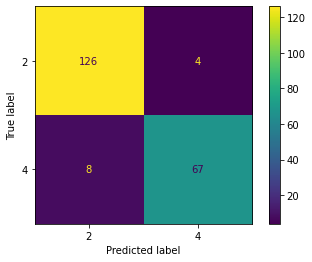

(None, None, None)

In [18]:
svc_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

svc with lda

the score for lda is  0.9832808123249299 
 Best parameters are  {'C': 4, 'gamma': 1, 'kernel': 'rbf'} 



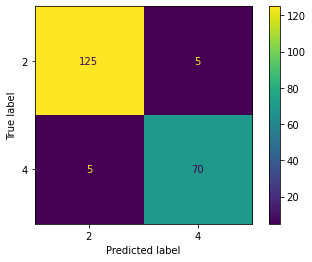

where the n_components parameter equals to:  1


In [19]:
a = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
svc_with_lda(x_train = x_train, x_test = x_test,y_train = y_train, y_test = y_test, n = a)
print("where the n_components parameter equals to: ", a)

svc with pca

the score for pca is  0.9811799719887955 
 Best parameters are  {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'} 



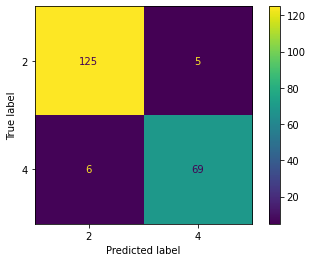

with the n_components parameter equals to:  4


In [10]:
b = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
svc_with_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = b)
print("with the n_components parameter equals to: ", b)

## **Random Forest**

In [11]:
from random_forest import random_lda, random_pca, random_normal

random normal

Best parameters are: 
 {'criterion': 'entropy', 'n_estimators': 34} 
 best accuracy score is: 
 0.9769957983193278


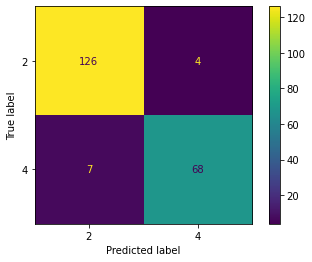

(None, None, None)

In [12]:
random_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

random with pca

Best parameters are: 
 {'criterion': 'entropy', 'n_estimators': 25} 
 best accuracy score is: 
 0.9769957983193278


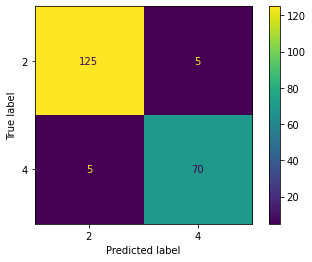

with the n_components value:  4


In [13]:
k = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
random_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = k)
print("with the n_components value: ", k)

random with lda

Best parameters are: 
 {'criterion': 'gini', 'n_estimators': 5} 
 best accuracy score is: 
 0.9811799719887955


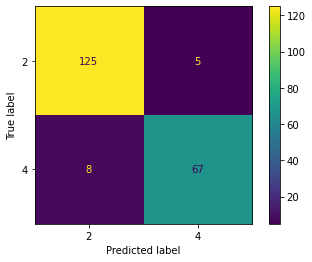

with the n_components value: 1


In [14]:
l = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
random_lda(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = l)
print("with the n_components value:", l)

## **KNN(K-nearest Neighbor)**

In [15]:
from neighbor import knn_normal, knn_pca, knn_lda

knn normal

Best parameters are: 
 {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} 
 best accuracy score is: 
 0.9790966386554623


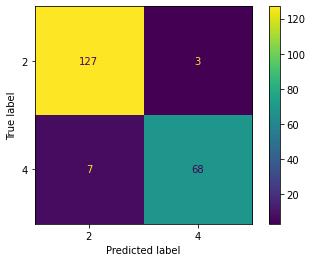

(None, None, None)

In [16]:
knn_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

knn with pca

the score for pca is  0.9811799719887955 
 Best parameters are  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'p': 3, 'weights': 'uniform'} 



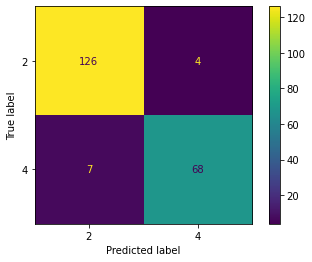

with the n_components value is equal to:  4


In [17]:
c = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
knn_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = c)
print("with the n_components value is equal to: ", c)

knn with lda

the score for lda is  0.9832808123249299 
 Best parameters are  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'} 



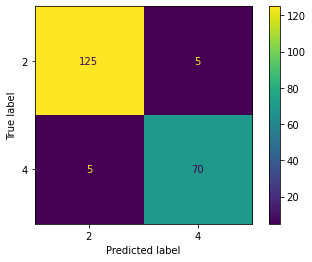

with the n_components value is equal to:  1


In [18]:
d = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
knn_lda(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = d)
print("with the n_components value is equal to: ", d)

## **Decision Tree**

In [19]:
from dec_tree import dec_normal, dec_lda, dec_pca

Decision Tree Normal

In [20]:
dec_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_train)


Best parameters are: 
 {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'} 
 best accuracy score is: 
 0.9477240896358543


[]

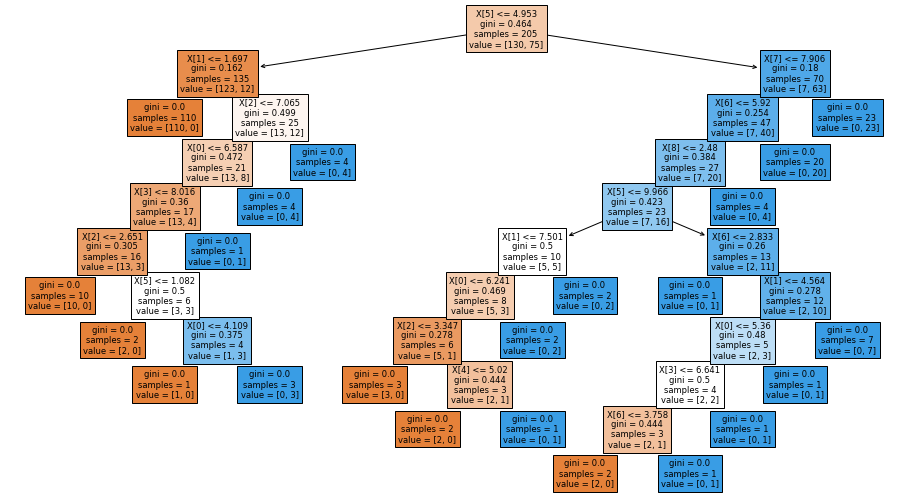

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier(criterion = 'gini', max_features = 'auto', splitter = 'random')
dt.fit(x_test, y_test)
plt.figure(figsize = (16, 9))
plot_tree(dt, filled=True)
plt.savefig("dt_normal_tree.png")
plt.plot()

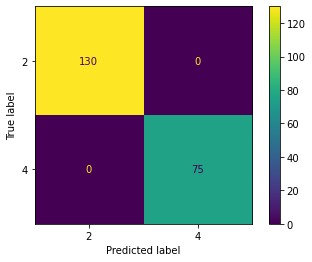

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, x_test, y_test)
plt.savefig("decision_tree_normal_confusion.png")
plt.show()

Decision Tree with pca

In [23]:
e = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
dec_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = e)
print("with the n_components value is equal to: ", e)

Best parameters are: 
 {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'} 
 best accuracy score is: 
 0.968609943977591
with the n_components value is equal to:  4


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x_train2 = pca.fit_transform(x_train)
x_test2 = pca.fit_transform(x_test)

[]

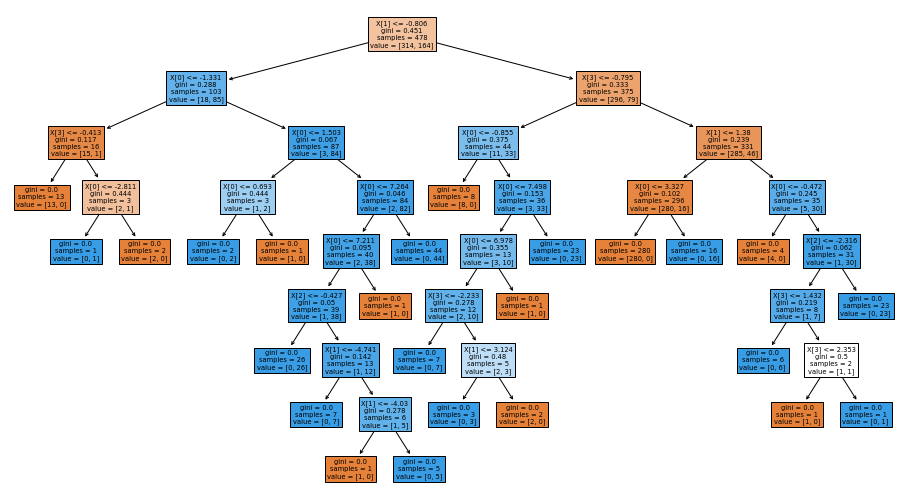

In [26]:
pca_dt = DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt', splitter = 'best')
pca_dt.fit(x_train2, y_train)
plt.figure(figsize = (16, 9))
plot_tree(pca_dt, filled=True)
plt.savefig("dt_pca_tree.png")
plt.plot()

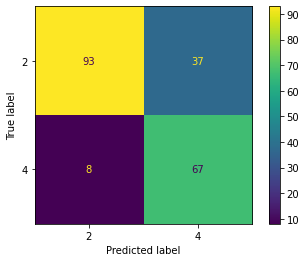

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pca_dt, x_test2, y_test)
plt.savefig("decision_tree_pca_confusion.png")
plt.show()

Decision Tree with lda

In [28]:
f = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
dec_lda(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = f)
print("with the n_components value is equal to: ", f)

Best parameters are: 
 {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'} 
 best accuracy score is: 
 0.979079131652661
with the n_components value is equal to:  1


In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
x_train3 = lda.fit_transform(x_train, y_train)
x_test3 = lda.transform(x_test)

[]

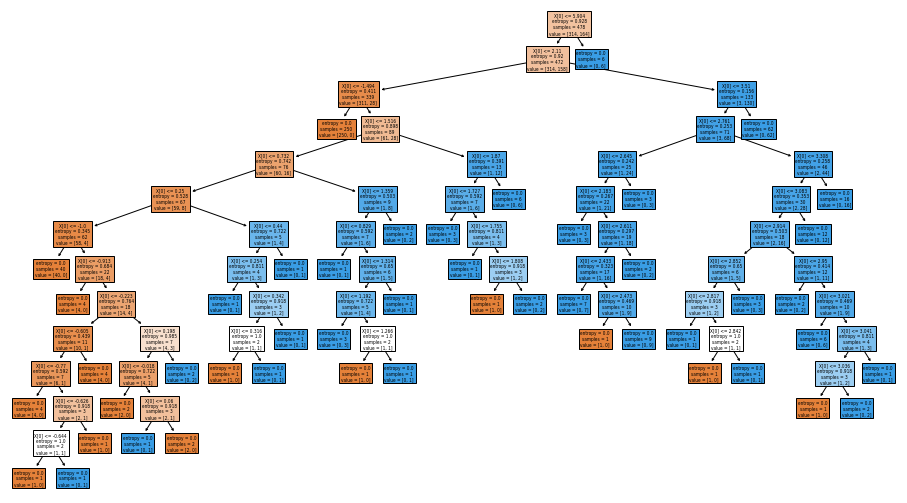

In [30]:
lda_dt = DecisionTreeClassifier(criterion = 'entropy', max_features = 'auto', splitter = 'random')
lda_dt.fit(x_train3, y_train)
plt.figure(figsize = (16, 9))
plot_tree(lda_dt, filled=True)
plt.savefig("dt_lda_tree.png")
plt.plot()

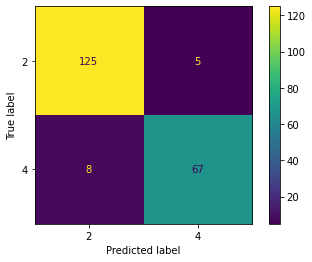

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lda_dt, x_test3, y_test)
plt.savefig("decision_tree_lda_confusion.png")
plt.show()

## **Logistic Regression**

In [32]:
from logis_reg import log_normal, log_lda, log_pca

Logistic Regression normal

c:\Users\salih\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\salih\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\salih\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\salih\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\salih\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Best parameters are: 
 {'C': 1, 'penalty': 'l2', 'solver': 'sag'} 
 best accuracy score is: 
 0.9728116246498599


c:\Users\salih\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


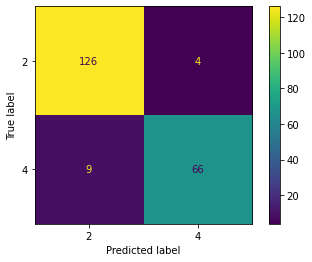

(None, None, None)

In [33]:
log_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

Logistic Regression with pca

the score for pca is  0.9727941176470588 
 Best parameters are  {'C': 1, 'penalty': 'l2', 'solver': 'sag'} 



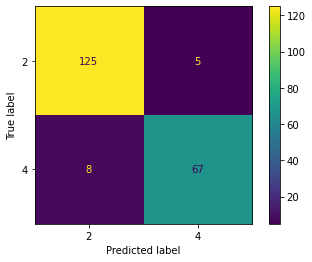

with the n_components value is equal to:  4


In [34]:
g = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
log_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = g)
print("with the n_components value is equal to: ", g)

Logistic Regression with lda

the score for lda is  0.9728116246498599 
 Best parameters are  {'C': 1, 'penalty': 'l2', 'solver': 'sag'} 



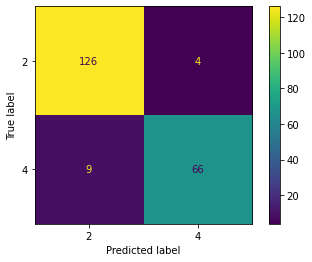

with the n_components value is equal to:  1


In [35]:
h = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
log_lda(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = h)
print("with the n_components value is equal to: ", h)

## **Naive Bayes**

### **Bernoulli NB**

In [36]:
from berno import berno_lda, berno_normal, berno_pca

normal

c:\Users\salih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\salih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\salih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score:
 0.6341463414634146 
 Mean Absolute Error:
 0.7317073170731707 
 Classification report:
               precision    recall  f1-score   support

           2       1.00      0.63      0.78       205
           4       0.00      0.00      0.00         0

    accuracy                           0.63       205
   macro avg       0.50      0.32      0.39       205
weighted avg       1.00      0.63      0.78       205
 



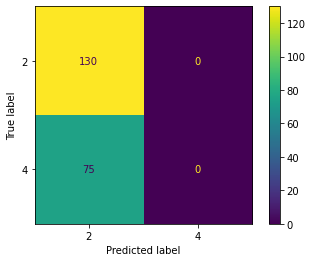

<Figure size 864x360 with 0 Axes>

(None, None, None, None, <BarContainer object of 2 artists>)

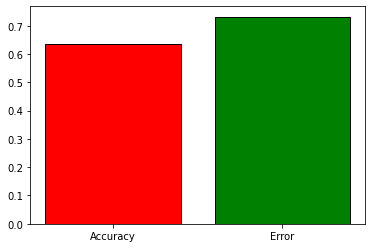

In [37]:
berno_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

with lda

Accuracy Score:
 0.9560975609756097 
 Mean Absolute Error:
 0.08780487804878048 
 Classification report:
               precision    recall  f1-score   support

           2       0.96      0.97      0.97       129
           4       0.95      0.93      0.94        76

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205
 



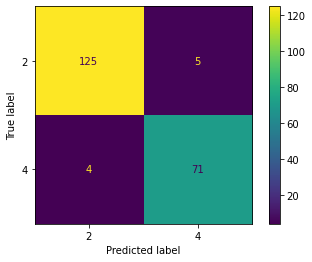

<Figure size 864x360 with 0 Axes>

with the n_components value is equal to:  1


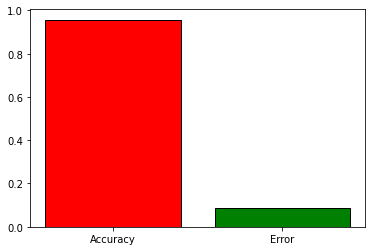

In [38]:
t = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
berno_lda(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = t)
print("with the n_components value is equal to: ", t)

with pca

Accuracy Score:
 0.9658536585365853 
 Mean Absolute Error:
 0.06829268292682927 
 Classification report:
               precision    recall  f1-score   support

           2       0.97      0.98      0.97       129
           4       0.96      0.95      0.95        76

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205
 



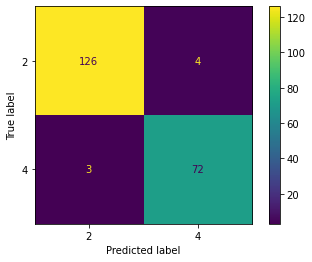

<Figure size 864x360 with 0 Axes>

with the n_components value is equal to:  4


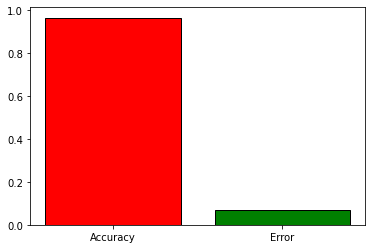

In [39]:
u = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
berno_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = u)
print("with the n_components value is equal to: ", u)

### **Gaussian NB**

In [40]:
from gaus import gaus_lda, gaus_normal, gaus_pca

normal

Accuracy Score:
 0.9463414634146341 
 Mean Absolute Error:
 0.1073170731707317 
 Classification report:
               precision    recall  f1-score   support

           2       0.93      0.98      0.96       123
           4       0.97      0.89      0.93        82

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205
 



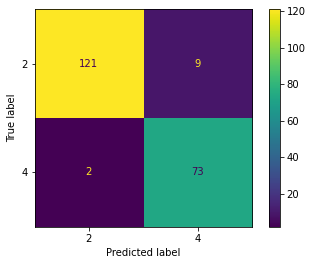

<Figure size 864x360 with 0 Axes>

(None, None, None, None, <BarContainer object of 2 artists>)

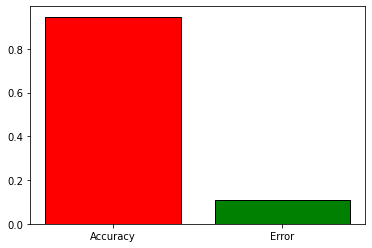

In [41]:
gaus_normal(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

with lda

Accuracy Score:
 0.9512195121951219 
 Mean Absolute Error:
 0.0975609756097561 
 Classification report:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       130
           4       0.93      0.93      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205
 



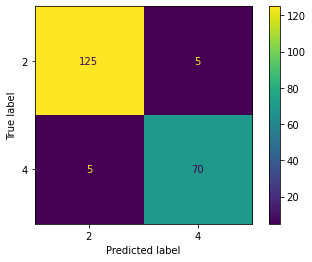

<Figure size 864x360 with 0 Axes>

with the n_components value is equal to:  1


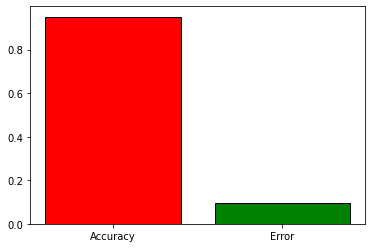

In [42]:
v = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_features, n_classes - 1) for dimensionality reduction.
# If None, will be set to min(n_classes-1, n_features). This parameter only affects the transfrom method.
gaus_lda(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = v)
print("with the n_components value is equal to: ", v)

with pca

Accuracy Score:
 0.9512195121951219 
 Mean Absolute Error:
 0.0975609756097561 
 Classification report:
               precision    recall  f1-score   support

           2       0.95      0.98      0.96       126
           4       0.96      0.91      0.94        79

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205
 



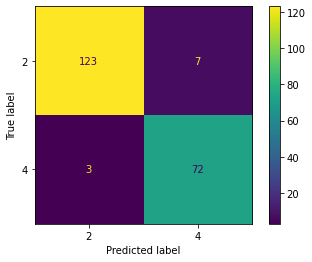

<Figure size 864x360 with 0 Axes>

with the n_components value is equal to:  4


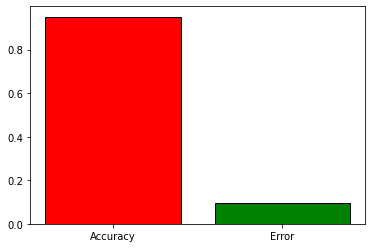

In [43]:
z = int(input('Enter the appropriate numeric value: ')) # n_components cannot be larger than min(n_samples, n_features), if n_components is not set; all components are kept
# for none case, n_componenets = min(n_samples, n_features) - 1 
gaus_pca(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, n = z)
print("with the n_components value is equal to: ", z)